In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

df = pd.read_csv("titanic.csv")

print(df.head(5))

# This dataset describe the information of the Titanic.
# https://www.kaggle.com/smv1999/titanic-minimal
# Press the download button
# I want to figure out the proportion of survived female vs. male, 
# the average age of both survived and unsurvived people, 
# number of people who lost relatives
# The relationship of survival rate and passenger class (Pivot table)



   Survived  Pclass     Sex   Age  Siblings/Spouses  Parents/Children     Fare
0         0       3    male  22.0                 1                 0   7.2500
1         1       1  female  38.0                 1                 0  71.2833
2         1       3  female  26.0                 0                 0   7.9250
3         1       1  female  35.0                 1                 0  53.1000
4         0       3    male  35.0                 0                 0   8.0500


In [3]:
print(df.describe())

         Survived      Pclass         Age  Siblings/Spouses  Parents/Children  \
count  887.000000  887.000000  887.000000        887.000000        887.000000   
mean     0.385569    2.305524   29.471443          0.525366          0.383315   
std      0.487004    0.836662   14.121908          1.104669          0.807466   
min      0.000000    1.000000    0.420000          0.000000          0.000000   
25%      0.000000    2.000000   20.250000          0.000000          0.000000   
50%      0.000000    3.000000   28.000000          0.000000          0.000000   
75%      1.000000    3.000000   38.000000          1.000000          0.000000   
max      1.000000    3.000000   80.000000          8.000000          6.000000   

            Fare  
count  887.00000  
mean    32.30542  
std     49.78204  
min      0.00000  
25%      7.92500  
50%     14.45420  
75%     31.13750  
max    512.32920  


In [4]:
print(df.columns)
print(df.index)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses',
       'Parents/Children', 'Fare'],
      dtype='object')
RangeIndex(start=0, stop=887, step=1)


In [5]:
print(df.sort_values(by=["Age"]))

     Survived  Pclass     Sex    Age  Siblings/Spouses  Parents/Children  \
799         1       3    male   0.42                 0                 1   
751         1       2    male   0.67                 1                 1   
641         1       3  female   0.75                 2                 1   
466         1       3  female   0.75                 2                 1   
827         1       2    male   0.83                 1                 1   
..        ...     ...     ...    ...               ...               ...   
115         0       3    male  70.50                 0                 0   
490         0       1    male  71.00                 0                 0   
95          0       1    male  71.00                 0                 0   
847         0       3    male  74.00                 0                 0   
627         1       1    male  80.00                 0                 0   

        Fare  
799   8.5167  
751  14.5000  
641  19.2583  
466  19.2583  
827  18.7500

In [6]:
#survived female vs. male
sur_f = df[df["Sex"] == "female"]
sur_m = df[df["Sex"] == "male"]
print(sur_m)

     Survived  Pclass   Sex   Age  Siblings/Spouses  Parents/Children     Fare
0           0       3  male  22.0                 1                 0   7.2500
4           0       3  male  35.0                 0                 0   8.0500
5           0       3  male  27.0                 0                 0   8.4583
6           0       1  male  54.0                 0                 0  51.8625
7           0       3  male   2.0                 3                 1  21.0750
..        ...     ...   ...   ...               ...               ...      ...
879         0       2  male  28.0                 0                 0  10.5000
880         0       3  male  25.0                 0                 0   7.0500
882         0       2  male  27.0                 0                 0  13.0000
885         1       1  male  26.0                 0                 0  30.0000
886         0       3  male  32.0                 0                 0   7.7500

[573 rows x 7 columns]


<AxesSubplot:ylabel='Frequency'>

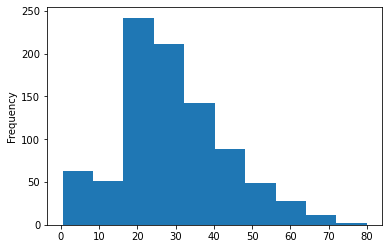

In [7]:
#age range of passengers
df["Age"].plot(kind="hist")

In [8]:
df.groupby(['Age']).mean()

,Survived,Pclass,Siblings/Spouses,Parents/Children,Fare
Age,,,,,
0.42,1.0,3.0,0.0,1.0,8.5167
0.67,1.0,2.0,1.0,1.0,14.5000
0.75,1.0,3.0,2.0,1.0,19.2583
0.83,1.0,2.0,0.5,1.5,23.8750
0.92,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...
70.00,0.0,1.5,0.5,0.5,40.7500
70.50,0.0,3.0,0.0,0.0,7.7500
71.00,0.0,1.0,0.0,0.0,42.0792


In [9]:
#the average age of both survived and unsurvived people,
survived = df[df["Survived"] == 0]
unsurvived = df[df["Survived"] == 1]
print(sum(survived["Age"])/survived["Age"].size)
print(sum(unsurvived["Age"])/unsurvived["Age"].size)



30.13853211009174
28.408391812865496


In [10]:
#number of people who lost relatives
total = sum(unsurvived["Siblings/Spouses"]) + sum(unsurvived["Parents/Children"])
print(total)

321


In [11]:
# The relationship of survival rate and passenger class (Pivot table)
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.137026

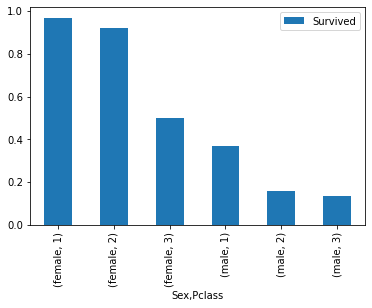

In [12]:
table.plot(kind='bar');

In [1]:
#analysis: 
#1. The survival rate of passengers decreased with a degrading Pclass among both the genders,
#2. The survival rate of male passengers was lower than the female passengers in any given Pclass.